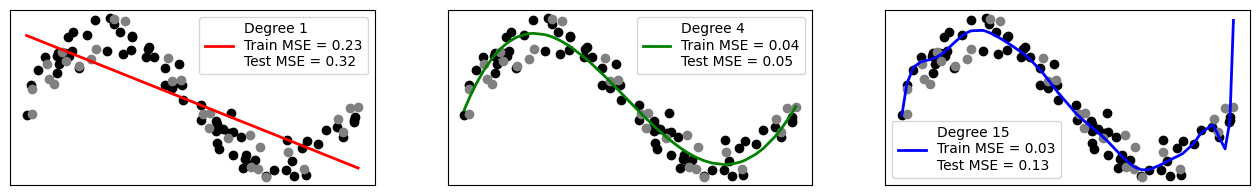

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate sample data
np.random.seed(0)
n_samples = 100
x = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi*x) + np.random.randn(n_samples) * 0.2

# Create polynomial features
degrees = [1, 4, 15]
colors = ['red', 'green', 'blue']
plt.figure(figsize=(16, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(2, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

    # Fit the model on training data
    model = LinearRegression()
    model.fit(np.vander(x_train, degree+1), y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(np.vander(x_train, degree+1))
    y_test_pred = model.predict(np.vander(x_test, degree+1))
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Plot the data and model
    plt.scatter(x_train, y_train, color='black')
    plt.scatter(x_test, y_test, color='gray')
    plt.plot(x, model.predict(np.vander(x, degree+1)), color=colors[i],
             label='Degree {}\nTrain MSE = {:.2f}\nTest MSE = {:.2f}'.format(degree, train_mse, test_mse),
             linewidth=2)
    plt.legend(loc='best')

plt.show()

In [ ]:
def plot_residuals_vs_fit(x,y,y_pred, model):
#    plot_data(X,Y)
#    x_plot = np.array([i/200.0 for i in range(200)])
#    X_plot = x_plot[:,np.newaxis]
    res = y - y_pred
    plt.plot(y_pred,res,'k.',color='orange',)
    plt.axhline(y=0., color='r', linestyle='-')
    plt.xlabel("predictions")
    plt.ylabel("residuals")

<ipython-input-44-9dafdeace2f7>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(y_pred,res,'k.',color='orange',)


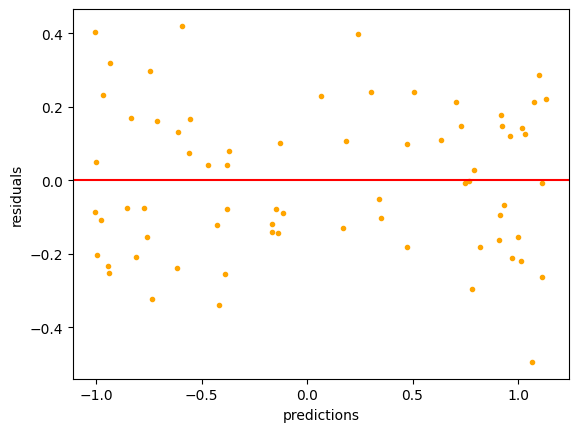

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# Fit the model on training data
model = LinearRegression()
model.fit(np.vander(x_train, 5), y_train)
# Predict on training and test sets
y_train_pred = model.predict(np.vander(x_train, 5))


plot_residuals_vs_fit(x_train,y_train, y_train_pred,model)

